In [110]:
# Celem programu jest rozpoznawanie na podstawie pomiarów części ciała trzech gatunków ptaków z rodzaju Acrocephalus -
# trzcinniczka, łozówki i zaroślówki. 
# Pomiary są wygenerowane sztucznie, ale są zgodne z danymi literaturowymi

In [111]:
# import pakietów i ustawienia notebooka
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import random
import seaborn as sns
from scipy.stats import truncnorm

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Trzcinniczek


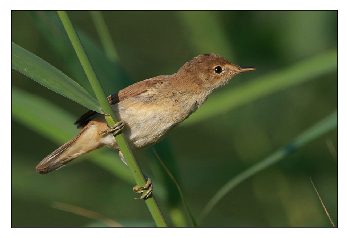

In [112]:
# To jeszcze na poczatek zobaczymy jak wyglądają te ptaki :)
print('Trzcinniczek')
image = mpimg.imread("trz.bmp")
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

Lozowka


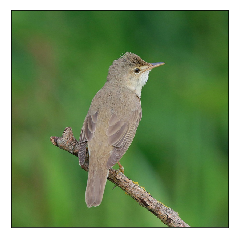

In [113]:
print('Lozowka')
image = mpimg.imread("loz.bmp")
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

Zaroslowka


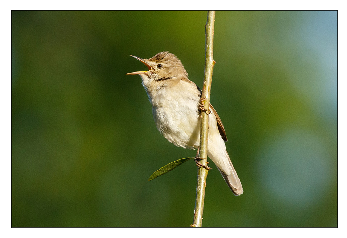

In [114]:
print('Zaroslowka')
image = mpimg.imread("zar.bmp")
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [115]:
# Generowanie tabeli z pomiarami 666 trzcinniczków
skrzydlo_t = [] 
for j in range(666): 
        skrzydlo_t.append(random.randint(62, 71)) 
        
ogon_t = [] 
for j in range(666): 
        ogon_t.append(random.randint(35, 39))
        

wciecie_pII_t = truncnorm(a=8/3, b=14/3,scale = 3 ).rvs(size=666)
wciecie_pII_t = wciecie_pII_t.round().astype(int)

dl_stopy_t = [] 
for j in range(666): 
        dl_stopy_t.append(random.randint(9, 12))
        
dl_dzioba_t = [] 
for j in range(666): 
        dl_dzioba_t.append(random.randint(10, 13))

trzcinniczek = pd.DataFrame(list(zip(skrzydlo_t, ogon_t, wciecie_pII_t, dl_stopy_t, dl_dzioba_t)), 
               columns =['Skrzydlo', 'Ogon', 'Wciecie_pII', 'dl_stopy', 'dl_dzioba']) 

In [116]:
# Generowanie tabeli z pomiarami 412 łozówek
skrzydlo_l = [] 
for j in range(412): 
        skrzydlo_l.append(random.randint(66, 74)) 
        
ogon_l = [] 
for j in range(412): 
        ogon_l.append(random.randint(36, 41))
        

wciecie_pII_l = truncnorm(a=6/3, b=11/3,scale = 3 ).rvs(size=412)
wciecie_pII_l = wciecie_pII_l.round().astype(int)

dl_stopy_l = [] 
for j in range(412): 
        dl_stopy_l.append(random.randint(7, 10))
        
dl_dzioba_l = [] 
for j in range(412): 
        dl_dzioba_l.append(random.randint(11, 14))

lozowka = pd.DataFrame(list(zip(skrzydlo_l, ogon_l, wciecie_pII_l, dl_stopy_l, dl_dzioba_l)), 
               columns =['Skrzydlo', 'Ogon', 'Wciecie_pII', 'dl_stopy', 'dl_dzioba']) 


In [117]:
# Generowanie tabeli z pomiarami 123 zaroslowek
skrzydlo_z = [] 
for j in range(123): 
        skrzydlo_z.append(random.randint(59, 67))
        
ogon_z = [] 
for j in range(123): 
        ogon_z.append(random.randint(34, 38))
        

wciecie_pII_z = truncnorm(a=9/3, b=15/3,scale = 3 ).rvs(size=123)
wciecie_pII_z = wciecie_pII_z.round().astype(int)

dl_stopy_z = [] 
for j in range(123): 
        dl_stopy_z.append(random.randint(6, 10))
        
dl_dzioba_z = [] 
for j in range(123): 
        dl_dzioba_z.append(random.randint(9, 14))      

zaroslowka = pd.DataFrame(list(zip(skrzydlo_z, ogon_z, wciecie_pII_z, dl_stopy_z, dl_dzioba_z)), 
               columns =['Skrzydlo', 'Ogon', 'Wciecie_pII', 'dl_stopy', 'dl_dzioba'])

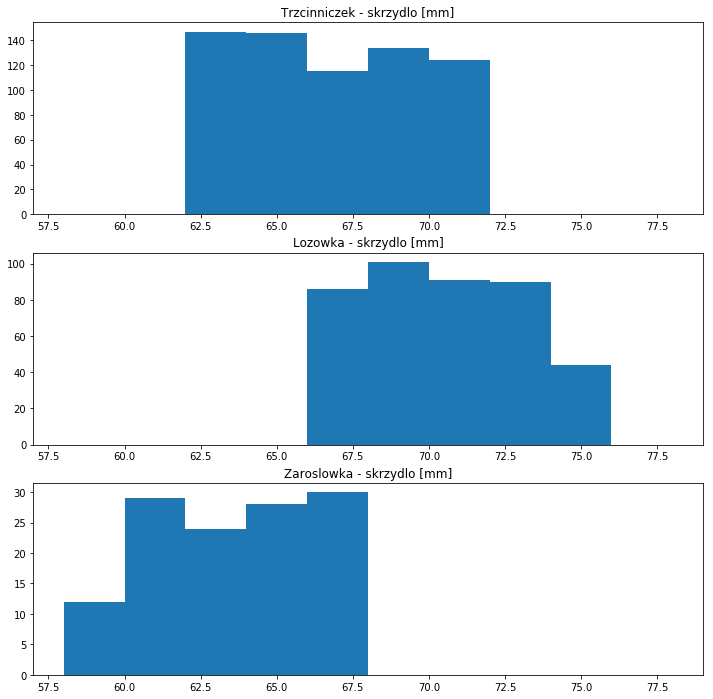

In [118]:
# histogramy z długością skrzydła róznych gatunków
plt.rc('figure', figsize=(12, 12))
plt.subplot(3,1,1)
plt.title('Trzcinniczek - skrzydlo [mm]')
plt.hist(trzcinniczek['Skrzydlo'], range=[58,78], bins = 10)

plt.subplot(3,1,2)
plt.title('Lozowka - skrzydlo [mm]')
plt.hist(lozowka['Skrzydlo'], range=[58,78])

plt.subplot(3,1,3)
plt.title('Zaroslowka - skrzydlo [mm]')
plt.hist(zaroslowka['Skrzydlo'], range=[58,78])

plt.show()

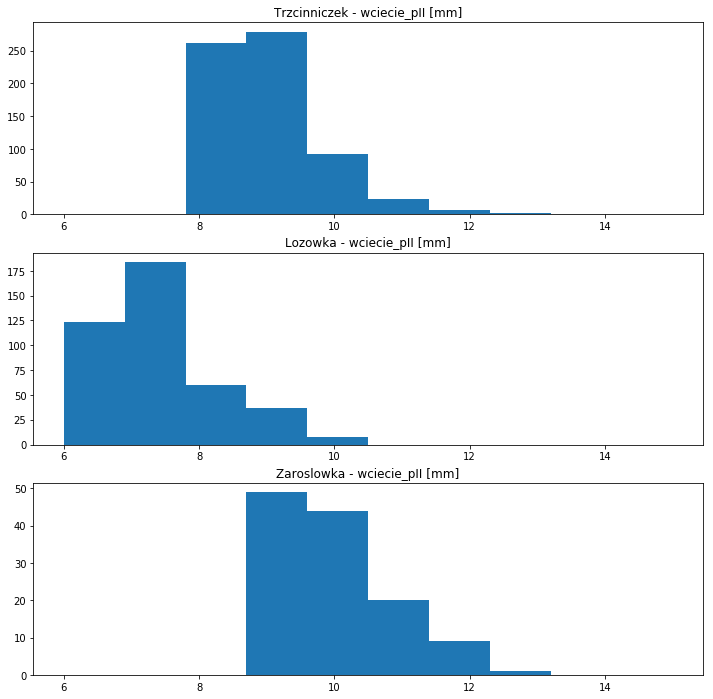

In [119]:
# histogramy z długościa wcięcia na drugiej lotce pierwszorzedowej
plt.subplot(3,1,1)
plt.title('Trzcinniczek - wciecie_pII [mm]')
plt.hist(trzcinniczek['Wciecie_pII'], range=[6,15])

plt.subplot(3,1,2)
plt.title('Lozowka - wciecie_pII [mm]')
plt.hist(lozowka['Wciecie_pII'], range=[6,15])

plt.subplot(3,1,3)
plt.title('Zaroslowka - wciecie_pII [mm]')
plt.hist(zaroslowka['Wciecie_pII'], range=[6,15])

plt.show()

In [120]:
# dodaje kolumny z nazwą gatunku do każdej tabeli
trzcinniczek['gatunek'] = 'trzcinniczek'
lozowka['gatunek'] = 'lozowka'
zaroslowka['gatunek'] = 'zaroslowka'

# połaczenie trzech tabel w jedną
List = [trzcinniczek, lozowka, zaroslowka]
dane = pd.concat(List, sort=True)
dane.head()

,Ogon,Skrzydlo,Wciecie_pII,dl_dzioba,dl_stopy,gatunek
0,38,64,8,11,9,trzcinniczek
1,39,64,10,11,10,trzcinniczek
2,36,69,9,13,12,trzcinniczek
3,36,68,9,11,10,trzcinniczek
4,37,67,8,13,12,trzcinniczek


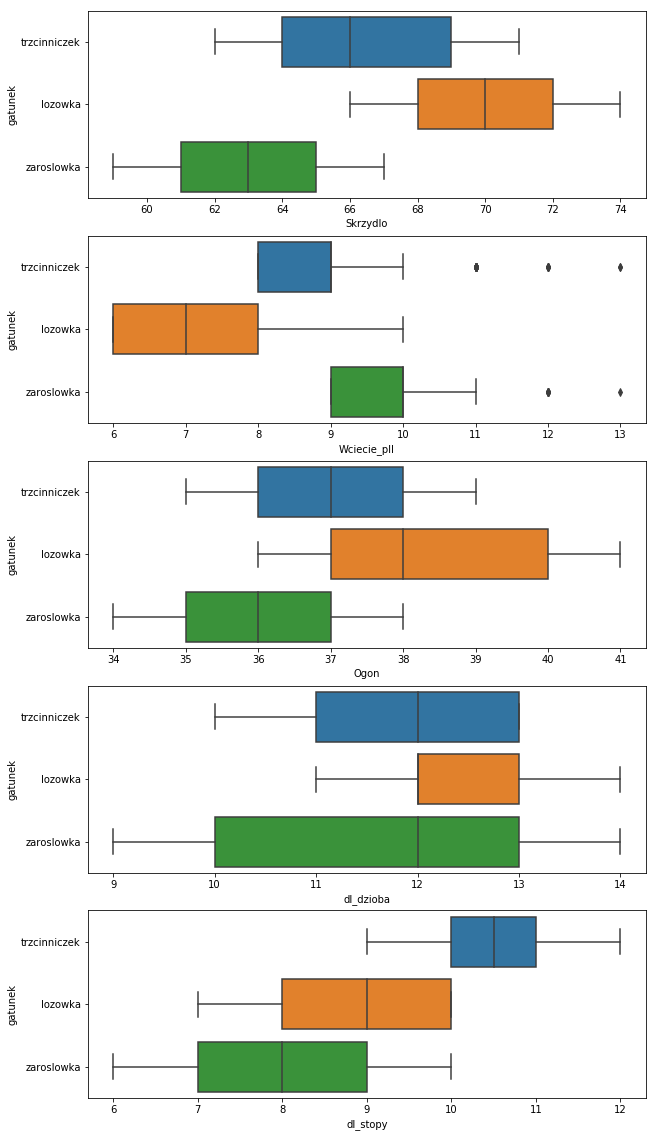

In [121]:
# wykresy pudełkowe dla wielkosci w kolumnach
plt.rc('figure', figsize=(10, 20))
plt.subplot(5,1,1)
ax = sns.boxplot(x="Skrzydlo", y="gatunek", data=dane)
plt.subplot(5,1,2)
ax = sns.boxplot(x="Wciecie_pII", y="gatunek", data=dane)
plt.subplot(5,1,3)
ax = sns.boxplot(x="Ogon", y="gatunek", data=dane)
plt.subplot(5,1,4)
ax = sns.boxplot(x="dl_dzioba", y="gatunek", data=dane)
plt.subplot(5,1,5)
ax = sns.boxplot(x="dl_stopy", y="gatunek", data=dane)

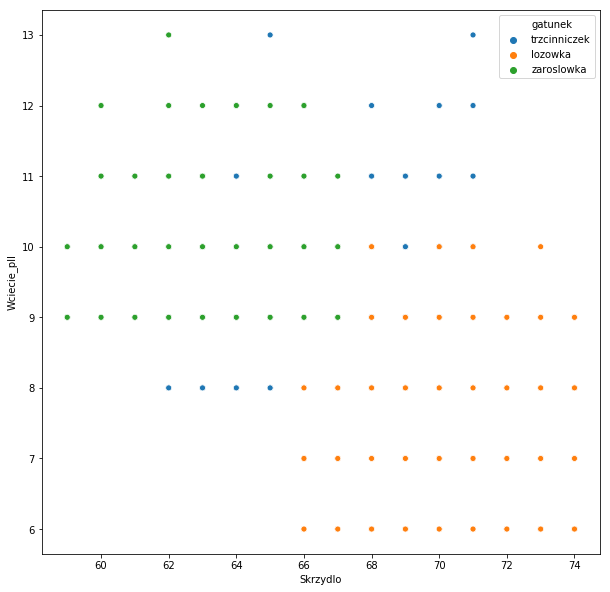

In [122]:
# wykres długości wciecia do długości skrzydła, widac, że łozówka ma generalnie długie skrzydło i krótkie wcięcie
plt.rc('figure', figsize=(10, 10))
sns.scatterplot(x="Skrzydlo", y="Wciecie_pII", data=dane, hue='gatunek');

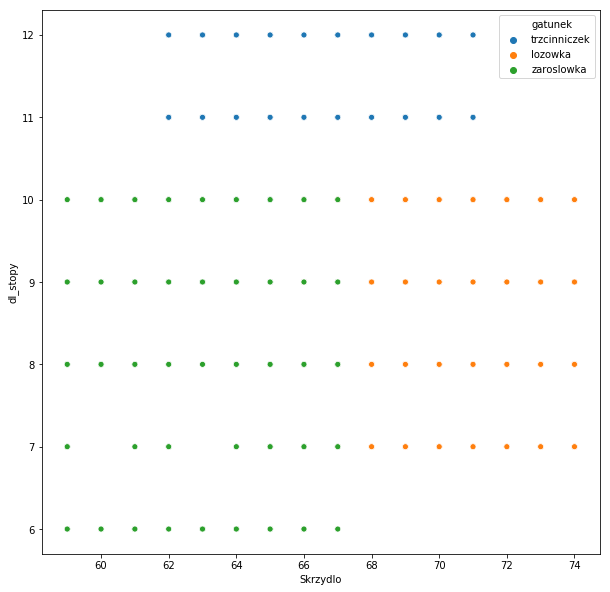

In [123]:
# wykres dł stopy do dł skrzydła, trzciniczki maja najdłuższe stopy, a zaroślówka i łozówka róznią sie dł. skrzydła
sns.scatterplot(x="Skrzydlo", y='dl_stopy', data=dane, hue='gatunek');

In [124]:
# zakodowanie nazw gatunków jako wartości liczbowe
dane["gatunek"] = dane["gatunek"].astype('category')
dane["gatunek"] = dane["gatunek"].cat.codes
dane.head()

,Ogon,Skrzydlo,Wciecie_pII,dl_dzioba,dl_stopy,gatunek
0,38,64,8,11,9,1
1,39,64,10,11,10,1
2,36,69,9,13,12,1
3,36,68,9,11,10,1
4,37,67,8,13,12,1


In [125]:
dane.describe()

,Ogon,Skrzydlo,Wciecie_pII,dl_dzioba,dl_stopy,gatunek
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,37.317236,67.253955,8.361366,11.889259,9.552873,0.759367
std,1.719528,3.503991,1.350052,1.260381,1.545125,0.622801
min,34.000000,59.000000,6.000000,9.000000,6.000000,0.000000
25%,36.000000,65.000000,7.000000,11.000000,9.000000,0.000000
50%,37.000000,67.000000,8.000000,12.000000,10.000000,1.000000
75%,39.000000,70.000000,9.000000,13.000000,11.000000,1.000000
max,41.000000,74.000000,13.000000,14.000000,12.000000,2.000000


In [126]:
dane['gatunek'].value_counts()

1    666
0    412
2    123
Name: gatunek, dtype: int64

In [127]:
# podział tabeli na zbiór testowy i treningowy, z uwzględnieniem liczby pomiarów dla poszczególnych gatunków
pomiary = dane.drop('gatunek', axis = 1)
gatunek = pd.DataFrame(dane['gatunek'])

X_train, X_test, Y_train, Y_test = train_test_split(pomiary, gatunek, test_size=0.2, stratify = gatunek, random_state=111)

In [128]:
# sprawdzenie jak poszczególne gatunki reprezentowane są w zbiorze treningowym  
Y_train['gatunek'].value_counts()

1    533
0    329
2     98
Name: gatunek, dtype: int64

In [129]:
# sprawdzenie jak poszczególne gatunki reprezentowane są w zbiorze testowym
Y_test['gatunek'].value_counts()

1    133
0     83
2     25
Name: gatunek, dtype: int64

In [130]:
# teraz wyuczę różne algorytmy klasyfikujące

# Klasyfikator SGD
sgd = linear_model.SGDClassifier()
sgd.fit(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

# Klasyfikator las losowy
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Regresja logistyczna
logreg = LogisticRegression()
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

# Klasyfikator k - najbliższych sasiadów
knn = KNeighborsClassifier() 
knn.fit(X_train, Y_train)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

# Naiwny klasyfikator Bayesowski
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

# Maszyna wektorów nośnych
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

# drzewo decyzyjne
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [131]:
# zebranie wyników w jeden obiekt dataframe
wyniki = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree]})
wyniki_df = wyniki.sort_values(by='Score', ascending=False)
wyniki_df = wyniki_df.set_index('Score')
wyniki_df.head(7)

,Model
Score,
99.58,Decision Tree
99.38,Random Forest
95.21,KNN
92.71,Naive Bayes
90.73,Logistic Regression
85.83,Support Vector Machines
45.31,Stochastic Gradient Decent


In [132]:
# ŁOOOOOOO, losowy las i drzewo decyzyjne dały niesamowicie dobre wyniki. 
# Sprawdźmy teraz las losowy przez walidację krzyżową na zbiorze treningowym
rf = RandomForestClassifier()
wyniki = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Dokładność:", wyniki)
print("Średnia:", wyniki.mean())
print("Odchylenie standardowe:", wyniki.std())

Dokładność: [0.96907216 0.95876289 0.98969072 0.9375     0.92708333 0.96875
 0.95833333 0.94791667 0.95789474 0.96808511]
Średnia: 0.9583088949754295
Odchylenie standardowe: 0.016797858379276033


In [133]:
# teraz to samo z drzewem decyzyjnym
tree = DecisionTreeClassifier()
wyniki = cross_val_score(tree, X_train, Y_train, cv=10, scoring = "accuracy")
print("Dokładność:", wyniki)
print("Średnia:", wyniki.mean())
print("Odchylenie standardowe:", wyniki.std())

Dokładność: [0.98969072 0.91752577 0.98969072 0.91666667 0.92708333 0.96875
 0.91666667 0.94791667 0.91578947 0.94680851]
Średnia: 0.9436588534150688
Odchylenie standardowe: 0.0284376952349937


In [134]:
# spróbujmy jeszcze z k - najbliższych sąsiadów
knn = KNeighborsClassifier() 
wyniki = cross_val_score(knn, X_train, Y_train, cv=10, scoring = "accuracy")
print("Dokładność:", wyniki)
print("Średnia:", wyniki.mean())
print("Odchylenie standardowe:", wyniki.std())

Dokładność: [0.93814433 0.93814433 0.94845361 0.92708333 0.92708333 0.95833333
 0.89583333 0.90625    0.95789474 0.92553191]
Średnia: 0.9322752253110291
Odchylenie standardowe: 0.019418354152489697


In [135]:
# no dobra, wychodzi, że las losowy daje najlepsze wyniki, zobaczmy jak wygląda macierz pomyłek dla zbioru treningowego
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[313,  13,   3],
       [  8, 522,   3],
       [  1,  14,  83]], dtype=int64)

In [136]:
# zobaczmy macierz pomyłek dla zbioru testowego
predictions = cross_val_predict(random_forest, X_test, Y_test, cv=3)
confusion_matrix(Y_test, predictions)

array([[ 75,   5,   3],
       [  4, 129,   0],
       [  0,   4,  21]], dtype=int64)

In [137]:
# ładnie :) spróbuję stworzyć nową cechę, może to poprawi predykcję
dane['skrzydlo/wciecie'] = dane['Skrzydlo']/dane['Wciecie_pII']
dane.head()

,Ogon,Skrzydlo,Wciecie_pII,dl_dzioba,dl_stopy,gatunek,skrzydlo/wciecie
0,38,64,8,11,9,1,8.000000
1,39,64,10,11,10,1,6.400000
2,36,69,9,13,12,1,7.666667
3,36,68,9,11,10,1,7.555556
4,37,67,8,13,12,1,8.375000


In [138]:
# podział tabeli na zbiór testowy i treningowy, z uwzględnieniem liczby pomiarów dla poszczególnych gatunków
pomiary = dane.drop('gatunek', axis = 1)
gatunek = pd.DataFrame(dane['gatunek'])

X_train, X_test, Y_train, Y_test = train_test_split(pomiary, gatunek, test_size=0.2, stratify = gatunek, random_state=111)

In [139]:
# Sprawdźmy teraz las losowy przez walidację krzyżową na zbiorze treningowym
rf = RandomForestClassifier()
wyniki = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Dokładność:", wyniki)
print("Średnia:", wyniki.mean())
print("Odchylenie standardowe:", wyniki.std())

Dokładność: [0.97938144 0.95876289 0.98969072 0.94791667 0.94791667 0.96875
 0.9375     0.94791667 0.94736842 0.95744681]
Średnia: 0.9582650281109661
Odchylenie standardowe: 0.015541934816002785


In [140]:
# stworzenie nowej cechy nie pomogło, uzyskałem praktycznie te same wyniki
# zobaczmy jeszcze macierz pomyłek z nową cechą
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[312,  12,   5],
       [  8, 521,   4],
       [  0,   9,  89]], dtype=int64)

In [142]:
# poprawiło się rozpoznawanie zaroślówek, spróbujmy jeszzce wyskalowac cechy
dane[['Skrzydlo', 'Wciecie_pII', 'Ogon', 'dl_stopy', 'dl_dzioba', 'skrzydlo/wciecie']] = StandardScaler().fit_transform(dane[['Skrzydlo', 'Wciecie_pII', 'Ogon', 'dl_stopy', 'dl_dzioba', 'skrzydlo/wciecie']])
dane.head()

,Ogon,Skrzydlo,Wciecie_pII,dl_dzioba,dl_stopy,gatunek,skrzydlo/wciecie
0,0.397230,-0.929029,-0.267779,-0.705842,-0.357967,1,-0.179246
1,0.979027,-0.929029,1.214262,-0.705842,0.289500,1,-1.152574
2,-0.766364,0.498509,0.473242,0.881641,1.584433,1,-0.382023
3,-0.766364,0.213002,0.473242,-0.705842,0.289500,1,-0.449615
4,-0.184567,-0.072506,-0.267779,0.881641,1.584433,1,0.048878


In [143]:
# podział tabeli na zbiór testowy i treningowy, z uwzględnieniem liczby pomiarów dla poszczególnych gatunków
pomiary = dane.drop('gatunek', axis = 1)
gatunek = pd.DataFrame(dane['gatunek'])

X_train, X_test, Y_train, Y_test = train_test_split(pomiary, gatunek, test_size=0.2, stratify = gatunek, random_state=111)

# Sprawdźmy teraz las losowy przez walidację krzyżową na zbiorze treningowym
rf = RandomForestClassifier()
wyniki = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Dokładność:", wyniki)
print("Średnia:", wyniki.mean())
print("Odchylenie standardowe:", wyniki.std())

Dokładność: [0.97938144 0.96907216 0.98969072 0.95833333 0.96875    0.96875
 0.94791667 0.94791667 0.95789474 0.95744681]
Średnia: 0.9645152541916318
Odchylenie standardowe: 0.012627255661986891


In [144]:
# mamy progres :)
# przeszukam teraz siatkę w celu odnalezienia optymalnych parametrów
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 100], 
              "min_samples_split" : [2, 4, 8, 16, 25, 50], 
              "n_estimators": [10, 20, 50, 100, 500]}

rf = RandomForestClassifier()
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [147]:
# Sprawdźmy teraz las losowy przez walidację krzyżową na zbiorze treningowym z otrzymanymi parametrami
rf = RandomForestClassifier(criterion = 'gini', min_samples_leaf=1, min_samples_split = 4, n_estimators = 100)
wyniki = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Dokładność:", wyniki)
print("Średnia:", wyniki.mean())
print("Odchylenie standardowe:", wyniki.std())

Dokładność: [0.96907216 0.95876289 0.98969072 0.95833333 0.97916667 0.97916667
 0.9375     0.95833333 0.95789474 0.95744681]
Średnia: 0.9645367318548621
Odchylenie standardowe: 0.014202228405368646


In [148]:
# średnie dokładnośc faktycznie minimalnie wyższa, ale std wyższe...

# zobaczmy macierz pomyłek dla zbioru treningowego dla domyślnych parametrów
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[313,  12,   4],
       [  8, 520,   5],
       [  1,  11,  86]], dtype=int64)

In [149]:
# zobaczmy macierz pomyłek dla zbioru treningowego dla optymalnych parametrów
predictions = cross_val_predict(RandomForestClassifier(criterion = 'gini', min_samples_leaf=1, min_samples_split = 4, 
                                       n_estimators = 100), X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[311,  15,   3],
       [  3, 526,   4],
       [  0,  11,  87]], dtype=int64)

In [150]:
# zobaczmy macierz pomyłek dla zbioru testowego dla domyślnych parametrów
predictions = cross_val_predict(random_forest, X_test, Y_test, cv=3)
confusion_matrix(Y_test, predictions)

array([[ 76,   4,   3],
       [  5, 128,   0],
       [  1,   2,  22]], dtype=int64)

In [151]:
# zobaczmy macierz pomyłek dla zbioru testowego dla optymalnych parametrów
predictions = cross_val_predict(RandomForestClassifier(criterion = 'gini', min_samples_leaf=1, min_samples_split = 4, 
                                       n_estimators = 100), X_test, Y_test, cv=3)
confusion_matrix(Y_test, predictions)

array([[ 75,   5,   3],
       [  0, 133,   0],
       [  0,   3,  22]], dtype=int64)

In [ ]:
# myslę, że udało się fajnie podkręcić wyniki. Ostatecznie tylko 11 ptaków ze zbiorów testowego zostało źle rozpoznanych :)